In [29]:
!pip install pandas

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [31]:
# lakukan load dataset terlebih dahulu
import pandas as pd
buddymove = pd.read_csv("drive/My Drive/buddymove_holidayiq.csv")
buddymove.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [32]:
buddymove.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User Id    249 non-null    object
 1   Sports     249 non-null    int64 
 2   Religious  249 non-null    int64 
 3   Nature     249 non-null    int64 
 4   Theatre    249 non-null    int64 
 5   Shopping   249 non-null    int64 
 6   Picnic     249 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 13.7+ KB


In [33]:
missing_data = buddymove.isnull()
missing_data.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [34]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

User Id
False    249
Name: User Id, dtype: int64

Sports
False    249
Name: Sports, dtype: int64

Religious
False    249
Name: Religious, dtype: int64

Nature
False    249
Name: Nature, dtype: int64

Theatre
False    249
Name: Theatre, dtype: int64

Shopping
False    249
Name: Shopping, dtype: int64

Picnic
False    249
Name: Picnic, dtype: int64



In [35]:
from sklearn.cluster import KMeans

# menghilangkan kolom user id
X = buddymove.drop(['User Id'], axis=1)

#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

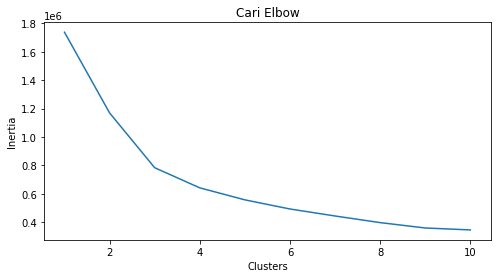

In [36]:
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

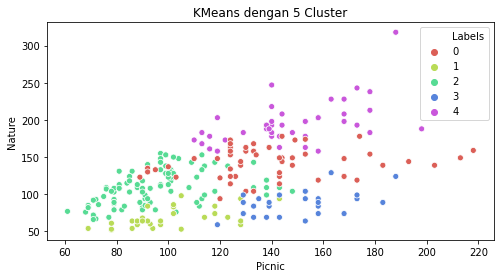

In [39]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['Picnic'], X['Nature'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()